In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

# Load the data

In [2]:
X=pd.read_csv("dataset and all/training_set_features.csv")
y=pd.read_csv("dataset and all/training_set_labels.csv")

### Basic questions

In [3]:
X.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
X.shape

(26707, 36)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
X.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [7]:
data=X.merge(y,on='respondent_id') # Merging fetures and a labels in a single datatframe

Text(0.5, 1.0, 'Correlation of features with xyz_vaccine label')

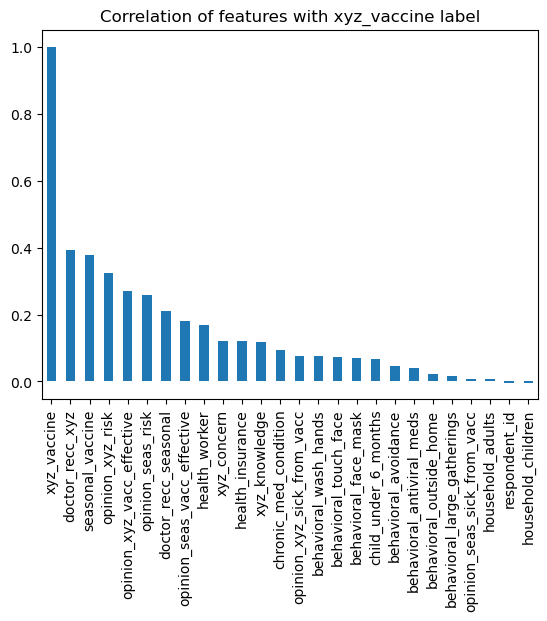

In [8]:
corr=data.corr()
corr['xyz_vaccine'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of features with xyz_vaccine label')

Text(0.5, 1.0, 'Correlation of features with seasonal_vaccine label')

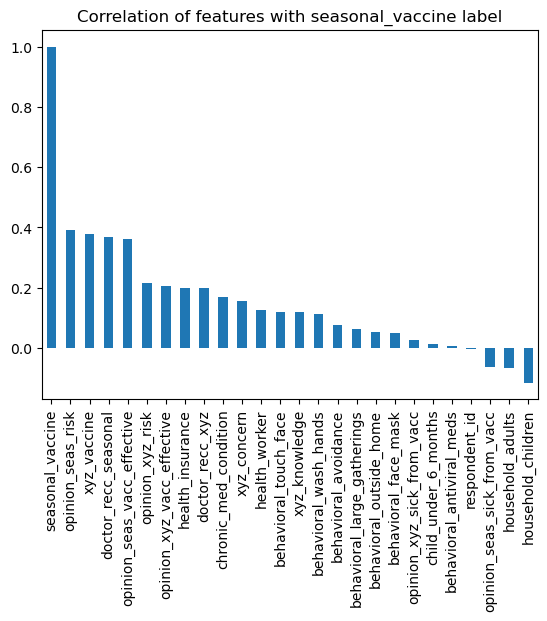

In [9]:
corr['seasonal_vaccine'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of features with seasonal_vaccine label')

Text(0.5, 1.0, 'Missing value count for each feature')

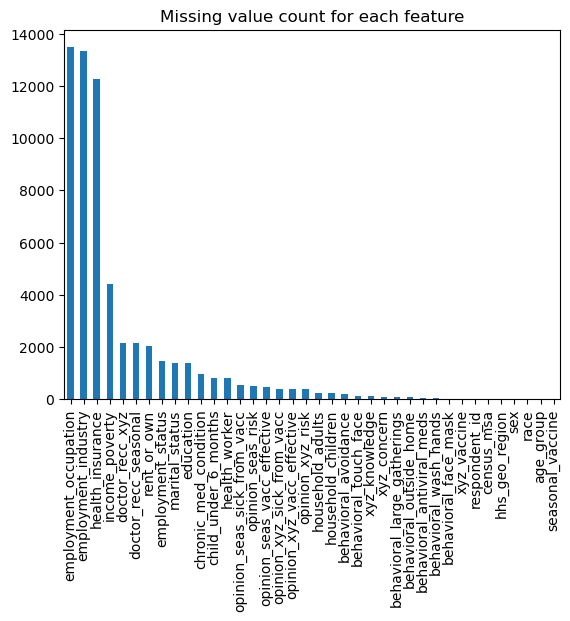

In [10]:
data.isnull().sum().sort_values(ascending=False).plot(kind='bar') 
plt.title("Missing value count for each feature")

#### Getting the list of columns which should be removed due to missing value

In [11]:
def remove_col_list(data,min_percent_missing):
    remove_list=[]
    for i in data.columns:
        missing_percent_per_feature=(data.isnull().sum()[i]/data.shape[0])*100
        if missing_percent_per_feature>min_percent_missing:
            remove_list.append(i)
        else:
            pass
    return remove_list

#### Separating the numerical and categorical features list

In [12]:
def sep_num_cat_features(data):
    num_features=data.select_dtypes(include='number')
    cat_features=data.select_dtypes(include='object')
    return num_features.columns,cat_features.columns

#### For dropping a column and providing the dataframe

In [13]:
def drop_col(data,columns):
    return data.drop(columns,axis=1,inplace=True)

#### To get feature names after preprocessing

In [14]:
def preprocessing_feature_list(transformer):
    col_list=[]
    for i in transformer.transformers_:
        for j in i[1].get_feature_names_out():
            col_list.append(j)
    return col_list


#### Making new features from existing one to reduce features and have better correlation

In [15]:
def new_features(data):
    data["behavioral_precautions"] = data['behavioral_antiviral_meds'] + data['behavioral_avoidance'] + data['behavioral_face_mask'] +data['behavioral_large_gatherings'] + data['behavioral_outside_home'] + data['behavioral_touch_face'] +data['behavioral_wash_hands']
    data['household_members'] = data['household_children'] + data['household_adults']
    return data.drop(['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask','behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face','behavioral_wash_hands', 'household_children', 'household_adults'],axis=1)
    

#### Time to modify our training data

In [16]:
#Get those columns having missing values greater than 20%
columns_to_remove=remove_col_list(X,20)

#Remove those columns and update the training data
X_1=X.drop(columns_to_remove,axis=1)

# Get numerical and categorical features list
num_features,cat_features=sep_num_cat_features(X_1)

#Preprocessing Part
preprocessing=ColumnTransformer(transformers=[
    ("num_imputer",SimpleImputer(strategy='median'),num_features),
    ("cat_imputer",SimpleImputer(strategy='most_frequent'),cat_features),
    ("OHE",OneHotEncoder(drop='first',handle_unknown='ignore'),cat_features)
],remainder='passthrough',verbose=True)

#Fitting and Transforming the training data
processed_x=preprocessing.fit_transform(X_1)

#After getting this processed data we get the features name from the transformer
post_feature_list=preprocessing_feature_list(preprocessing)

#Converting the ndarray to dataframe
pro_x=pd.DataFrame(processed_x,columns=post_feature_list)

#Now removing columns which have multiple occurence 
pro_x=pro_x.drop(cat_features,axis=1)

#Making some new features from existing one and dropping the old ones
final_x=new_features(pro_x)

# Setting the index as respondent_id
final_x.set_index('respondent_id',inplace=True)
y.set_index('respondent_id',inplace=True)

[ColumnTransformer] ... (1 of 3) Processing num_imputer, total=   0.1s
[ColumnTransformer] ... (2 of 3) Processing cat_imputer, total=   0.1s
[ColumnTransformer] ........... (3 of 3) Processing OHE, total=   0.1s


In [17]:
final_x

,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,behavioral_precautions,household_members
respondent_id,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0
1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
26703.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
26704.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


### Checking which model performs better

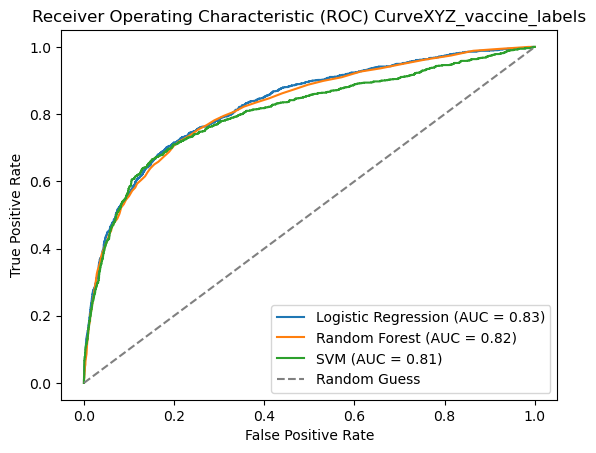


AUC-ROC Scores:
When fitting model with labels xyz_vaacine
Logistic Regression: 0.8282
When fitting model with labels xyz_vaacine
Random Forest: 0.8230
When fitting model with labels xyz_vaacine
SVM: 0.8058


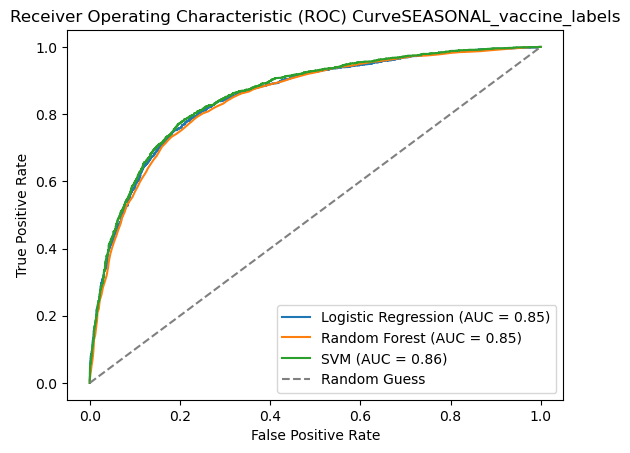


AUC-ROC Scores:
When fitting model with labels seasonal_vaacine
Logistic Regression: 0.8517
When fitting model with labels seasonal_vaacine
Random Forest: 0.8467
When fitting model with labels seasonal_vaacine
SVM: 0.8571


In [18]:
x_train,x_test,y_train,y_test=train_test_split(final_x,y,test_size=0.2,random_state=42)
xyz_train_labels=y_train['xyz_vaccine']
xyz_test_labels=y_test['xyz_vaccine']
seasonal_train_labels=y_train['seasonal_vaccine']
seasonal_test_labels=y_test['seasonal_vaccine']

# Define models to evaluate
models_xyz = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)  # Need probability=True for AUC-ROC
}
models_seasonal={
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)  # Need probability=True for AUC-ROC
}

# Dictionary to store AUC-ROC scores for each model
auc_roc_scores = {}

# Train and evaluate each model
for models in [models_xyz,models_seasonal]:
    if models==models_xyz:
        train_y=xyz_train_labels
        test_y=xyz_test_labels
    else:
        train_y=seasonal_train_labels
        test_y=seasonal_test_labels
    auc_roc_scores={}
    for model_name, model in models.items():
    # Train model
        model.fit(x_train, train_y)
    
    # Predict probabilities on test set
        y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    # Calculate AUC-ROC score
        auc_roc = roc_auc_score(test_y, y_pred_proba)
    
    # Store AUC-ROC score in dictionary
        auc_roc_scores[model_name] = auc_roc
    
    # Optionally, plot ROC curve
        fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')

# Plot ROC curve for all models
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if models==models_xyz:
        plt.title('Receiver Operating Characteristic (ROC) Curve'+'XYZ_vaccine_labels')
    else:
        plt.title('Receiver Operating Characteristic (ROC) Curve'+'SEASONAL_vaccine_labels')
    plt.legend(loc='lower right')
    plt.show()

# Display AUC-ROC scores
    print("\nAUC-ROC Scores:")
    for model_name, score in auc_roc_scores.items():
        if models==models_xyz:
            print("When fitting model with labels xyz_vaacine")
        else:
            print("When fitting model with labels seasonal_vaacine")
        print(f"{model_name}: {score:.4f}")


### Training and Hypertuning the model 

In [19]:
final_model_xyz=LogisticRegression()
final_model_seasonal=LogisticRegression()

final_model_xyz.fit(x_train,xyz_train_labels)
final_model_seasonal.fit(x_train,seasonal_train_labels)

xyz_pred_labels=final_model_xyz.predict(x_test)
seasonal_pred_labels=final_model_seasonal.predict(x_test)

In [20]:
def report(true_labels,pred_labels):
    print("Confusion_matrix")
    sns.heatmap(confusion_matrix(true_labels,pred_labels),annot=True)
    plt.show()
    print("Classification report:")
    print(classification_report(true_labels,pred_labels))

Report for xyz_vaccine_model before hypertuning:
Confusion_matrix


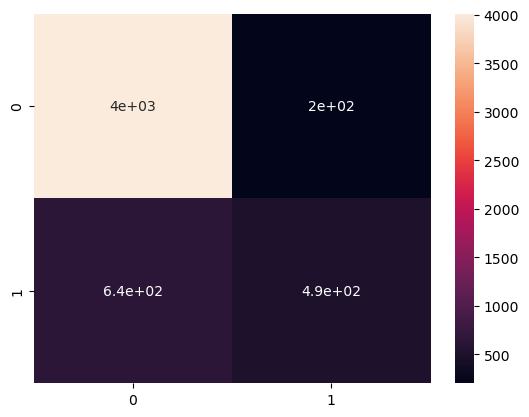

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.71      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



In [21]:
print("Report for xyz_vaccine_model before hypertuning:")
report(xyz_test_labels,xyz_pred_labels)

Report for Seasonal_vaccine_model before hypertuning:
Confusion_matrix


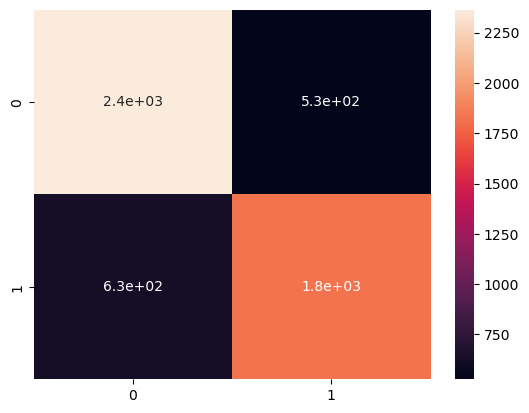

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2891
           1       0.78      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [22]:
print("Report for Seasonal_vaccine_model before hypertuning:")
report(seasonal_test_labels,seasonal_pred_labels)

#### Hypertuning model for xyz_vaccine_labels

In [23]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10),  # Only used if penalty='elasticnet'
    'C': np.logspace(-4, 4, 20)
}

# Create the GridSearchCV object
random_search_xyz = RandomizedSearchCV(final_model_xyz, param_grid, cv=5,n_iter=200, scoring='accuracy',verbose=True, n_jobs=-1,random_state=42)
random_search_seasonal = RandomizedSearchCV(final_model_seasonal, param_grid,n_iter=200, cv=5,verbose=True, scoring='accuracy', n_jobs=-1,random_state=42)


# Fit the model
random_search_xyz.fit(x_train, xyz_train_labels)
random_search_seasonal.fit(x_train, seasonal_train_labels)

# Print the best parameters and best score
print("Best parameters found for xyz_vaccine_model: ", random_search_xyz.best_params_)
print("Best cross-validation score for xyz_vaccine_model: {:.2f}".format(random_search_xyz.best_score_))
print("Best parameters found for seasonal_vaccine_model: ", random_search_seasonal.best_params_)
print("Best cross-validation score for seasonal_vaccine_model: {:.2f}".format(random_search_seasonal.best_score_))

# Evaluate the model on the test set
test_score_xyz = random_search_xyz.score(x_test, xyz_test_labels)
print("Test set score: {:.2f}".format(test_score_xyz))

test_score_sea = random_search_seasonal.score(x_test, seasonal_test_labels)
print("Test set score: {:.2f}".format(test_score_sea))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters found for xyz_vaccine_model:  {'solver': 'liblinear', 'penalty': 'l1', 'l1_ratio': 1.0, 'C': 0.08858667904100823}
Best cross-validation score for xyz_vaccine_model: 0.83
Best parameters found for seasonal_vaccine_model:  {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': 0.2222222222222222, 'C': 0.08858667904100823}
Best cross-validation score for seasonal_vaccine_model: 0.77
Test set score: 0.84
Test set score: 0.78


#### Training the whole data and predicting on training set after choosing best parameters

Report for XYZ_vaccine after hypertuning:
Confusion_matrix


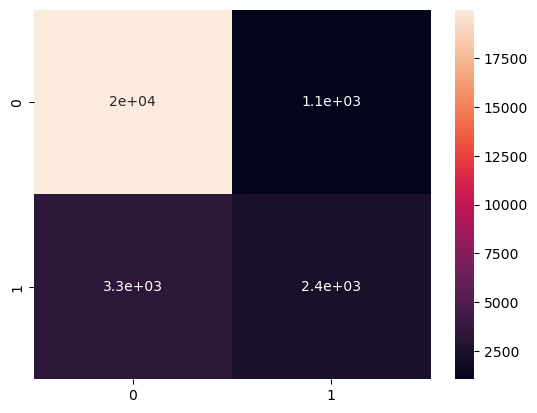

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21033
           1       0.69      0.42      0.52      5674

    accuracy                           0.84     26707
   macro avg       0.77      0.68      0.71     26707
weighted avg       0.82      0.84      0.82     26707

Report for Seasonal_vaccine_model after hypertuning:
Confusion_matrix


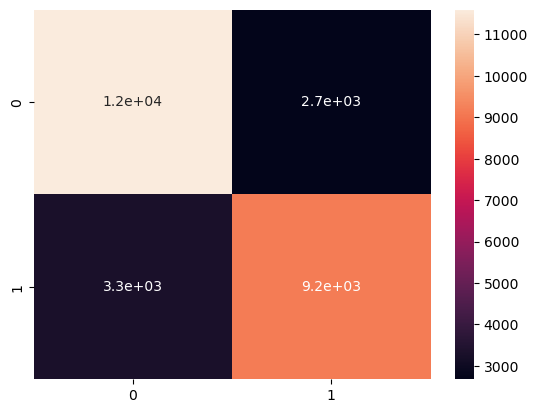

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.75     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.77      0.78     26707
weighted avg       0.78      0.78      0.78     26707



In [34]:
xyz_labels=y["xyz_vaccine"]
seasonal_labels=y["seasonal_vaccine"]

best_model_xyz=LogisticRegression(solver='liblinear',penalty='l1',l1_ratio=1,C=0.08858667904100823)
best_model_seasonal=LogisticRegression(solver='saga',penalty='l1',l1_ratio=0.22,C=0.08858667904100823)

best_model_xyz.fit(final_x,xyz_labels)
best_model_seasonal.fit(final_x,seasonal_labels)

pred_train_xyz=best_model_xyz.predict(final_x)
pred_train_seasonal=best_model_seasonal.predict(final_x)

print("Report for XYZ_vaccine after hypertuning:")
report(xyz_labels,pred_train_xyz)

print("Report for Seasonal_vaccine_model after hypertuning:")
report(seasonal_labels,pred_train_seasonal)

### Loading the test set ,transforming it and predicting probabilities of getting vaccines

In [35]:
test_set=pd.read_csv("dataset and all/test_set_features.csv")

In [36]:
test_set

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [37]:
test_set_1=test_set.drop(columns_to_remove,axis=1)

#
processed_test=preprocessing.transform(test_set_1)

#Converting the ndarray to dataframe
pro_test=pd.DataFrame(processed_test,columns=post_feature_list)

#Now removing columns which have multiple occurence 
pro_test=pro_test.drop(cat_features,axis=1)

#Making some new features from existing one and dropping the old ones
final_test=new_features(pro_test)

# Setting the index as respondent_id
final_test.set_index('respondent_id',inplace=True)

In [38]:
final_test

,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,behavioral_precautions,household_members
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0
26708.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
26709.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0
26710.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26711.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0
53411.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,4.0
53412.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [39]:
xyz_test_prob=best_model_xyz.predict_proba(final_test)[:,1]
seasonal_test_prob=best_model_seasonal.predict_proba(final_test)[:,1]

In [40]:
ids=final_test.reset_index()['respondent_id']

In [41]:
submission_dataframe=pd.DataFrame({
    'respondent_id':ids,
    'xyz_vaccine':np.round(xyz_test_prob,decimals=3),
    'seasonal_vaccine':np.round(seasonal_test_prob,decimals=3)
})

In [42]:
submission_dataframe

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707.0,0.098,0.233
1,26708.0,0.053,0.060
2,26709.0,0.422,0.660
3,26710.0,0.501,0.888
4,26711.0,0.195,0.473
...,...,...,...
26703,53410.0,0.350,0.514
26704,53411.0,0.106,0.330
26705,53412.0,0.144,0.215
26706,53413.0,0.057,0.381


In [43]:
submission_dataframe.to_csv("final_csv",index=False)